<a href="https://colab.research.google.com/github/salonichaturvedi/ML-Projects/blob/main/Shopping_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<center> Clustering - Unsupervised Learning

##<center> Case Study

#<center> Shopping Customer Segmentation

#<center> Problem Description

**Problem Statement:** 
Understand the Target Customers for the marketing team to plan a strategy.

**Context:**
My boss needs me to identlify the most potential customers based on their income, age and the card score of the mall shopping card.

He/ She wants the ideal number of groups with a label for each.

**Objective Market Segmentation:**
Divide the mall target market into approachable groups. Create subsets of a market based on demographic behavioural pattern to better understand the target for marketing activities.

**The Approach:**

1.   Peformance some quick Exploratory Data Analysis.
2.  Use KMEANS Clustering Algorithm to create our segments.
1.   Use Summary Statistics on the custers
2.   Visualize





In [1]:
#importing primary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# importing clustering library from sklearn

from sklearn.cluster import KMeans

In [3]:
#Importing data to a Pandas DataFrame and creating a copy to perform EDA
df = pd.read_csv('/content/Customer Segmentation Database.csv')

In [4]:
mall_cust_data = df.copy()

# Data Dictionary



*   CustomerID: Unique ID of the Customer
*   Gender: Gender of the Customer
*   Age: Age of the Customer
*   Annual Income (k): Annual income of the customer in ($1000)
*   Spending Score: Score between 1 and 100 indicating the amount of shopping and spending done








### Glancing the basic characteristics of our data

In [5]:
print('Rows: ', mall_cust_data.shape[0])
print('Columns: ', mall_cust_data.shape[1])

Rows:  200
Columns:  5


In [6]:
list_of_features= mall_cust_data.columns.tolist()
list_of_features

['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [7]:
mall_cust_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
mall_cust_data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [9]:
mall_cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#<center>Preprocessing Data


### Checking for missing value

In [10]:
mall_cust_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Number if Unique values in each column

It can help us determine the categorical / continous columns

In [11]:
mall_cust_data.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

**Observation:**


1.   No Null Values / Missing values
2.   Gender is categorical variable.
3.   All other columns are numerical and continous.



Let's check how our data looks like to see if there are any irrelevant columns from EDA and ML Perspective.

In [12]:
mall_cust_data.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
28,29,Female,40,29,31
107,108,Male,54,63,46
140,141,Female,57,75,5
141,142,Male,32,75,93
71,72,Female,47,49,42
184,185,Female,41,99,39
139,140,Female,35,74,72
165,166,Female,36,85,75
84,85,Female,21,54,57
193,194,Female,38,113,91


**Observation:** CustomerID column is not useful for EDA / ML modeling, hence can be dropped.

In [13]:
# Dropping CustomerID column
mall_cust_data.drop(labels='CustomerID',axis=1, inplace=True)

In [14]:
# Checking if the column is dropped successfully

mall_cust_data.sample(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
131,Male,39,71,75
105,Female,21,62,42
196,Female,45,126,28
46,Female,50,40,55
163,Female,31,81,93
162,Male,19,81,5
55,Male,47,43,41
176,Male,58,88,15
192,Male,33,113,8
26,Female,45,28,32


###Renaming Columns 
It is a good practice to avoid spaces in column names, as there are some functions or libraries which do not allow the same. We are not going to deal with any such library or function here, yet maintaining the good practice.

In [15]:
mall_cust_data.rename(columns={'Annual Income (k$)': 'Annual_Income', 'Spending Score (1-100)': 'Spending_Score'}, inplace=True)

#<center> Exploratory Data Analysis

EDA | 5 Point Summary

In [16]:
mall_cust_data.describe()

,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


**Insights:**
1. Age of the customers range from 18 to 70, with mean age 39. 
2. Annual Income ranges from 15000 USD to 137000 USD, with average income at 60500 USD.
3. Average Spending Score of the customers is 50.
4. Since the mean and the median of *Annual Income*, and *Spending Score* is very similar, we can assume that this is in *normal distribution*.

In [17]:
# Creating a list of categorical columns(cat_cols) and continous columns(con_cols)

cat_cols=[]
con_cols=[]

for i in mall_cust_data.columns.tolist():
  if mall_cust_data[i].dtype=='object':
    cat_cols.append(i)
  elif mall_cust_data[i].dtype=='int64':
    con_cols.append(i)

print('Categorical Columns:', cat_cols)
print('Continous Columns:', con_cols)

Categorical Columns: ['Gender']
Continous Columns: ['Age', 'Annual_Income', 'Spending_Score']


###Univariate Analysis | Categorical Variable - (Gender)

In [18]:
mall_cust_data['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [19]:
# percentage distribution of Gender variable
mall_cust_data['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

([<matplotlib.patches.Wedge at 0x7f674b34f2b0>,
 [Text(-0.20611945413751356, 1.080515974257694, 'Female'),
  Text(0.20611945413751367, -1.080515974257694, 'Male')],
 [Text(-0.11242879316591647, 0.5893723495951058, '56.00%'),
  Text(0.11242879316591654, -0.5893723495951058, '44.00%')])

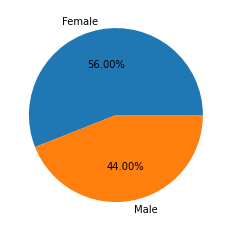

In [20]:
plt.pie(mall_cust_data['Gender'].value_counts(), data=mall_cust_data, autopct='%1.2f%%', labels=('Female', 'Male'))

**Observation:**
As is clear from the chart, 56% customers are female, weheras 44% customers are male.

###EDA | Univariate Anlaysis - Continous Variables

In [21]:
# defining a function of continous univariate analysis:

from seaborn.matrix import despine
def univariate_continous_graphs(dataset, feature):
  fig, ax=plt.subplots(nrows=2, ncols=1, figsize=(12,8))

  ax1=ax[0]
  ax2=ax[1]

  fig.suptitle('Univariate Plot on: '+ feature, fontsize=15, fontweight='bold')
  

  sns.boxplot(data=dataset, x=dataset[feature], ax=ax1)
  sns.despine(top=True, right=True, left=True)
  sns.distplot(x=dataset[feature], ax=ax2)

  mean= dataset[feature].mean()
  median= dataset[feature].median()
  mode= dataset[feature].mode().tolist()[0]

  ax2.axvline(mean, color='r', linestyle='--', linewidth=2)
  ax2.axvline(median, color='g', linestyle='-', linewidth=2)
  ax2.axvline(mode, color='b', linestyle='-', linewidth=2)

  plt.tight_layout()

  

  
    




['Age', 'Annual_Income', 'Spending_Score']
0
1


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


2


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


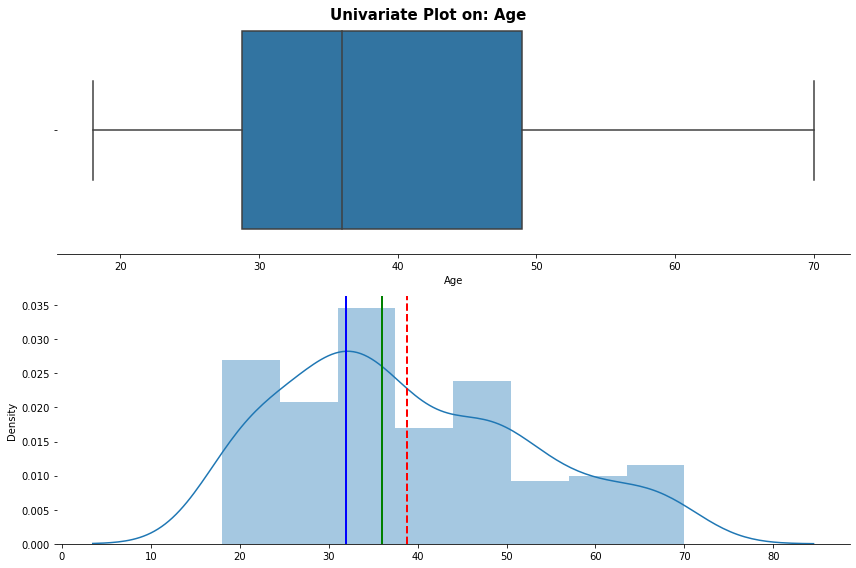

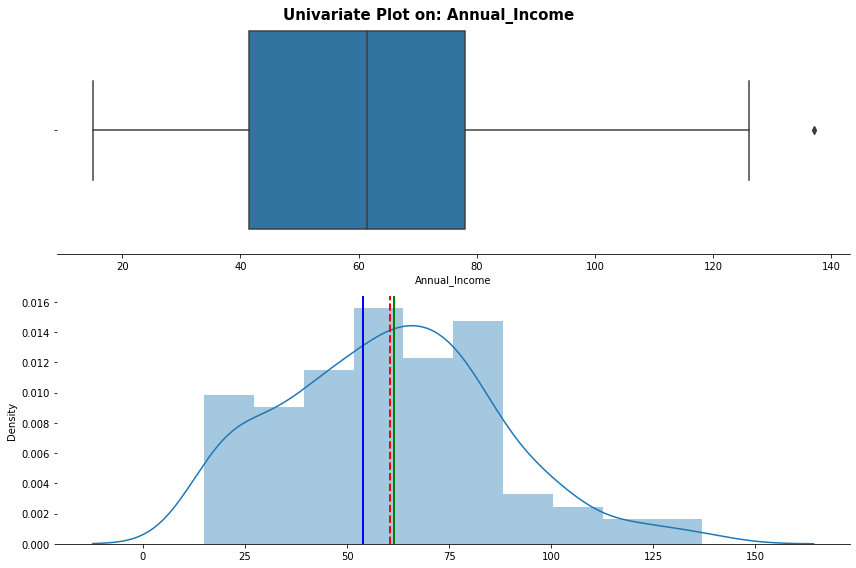

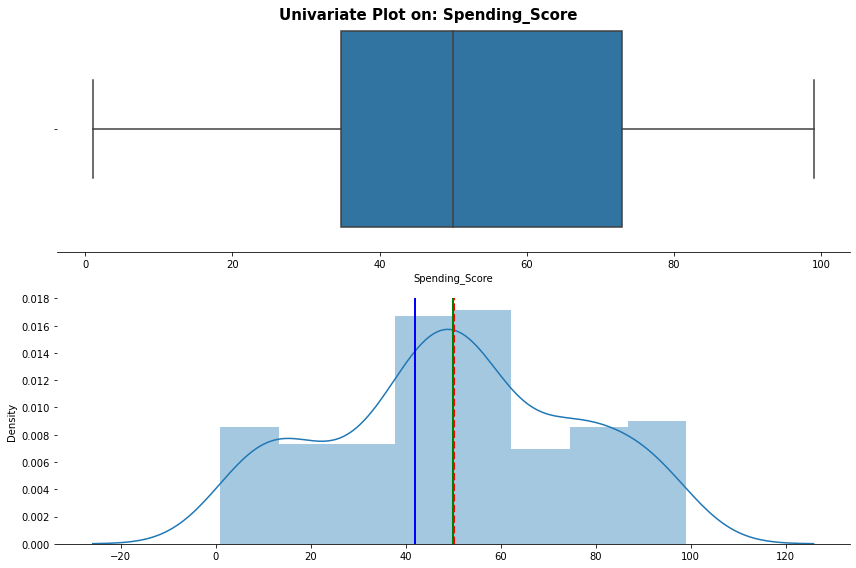

In [22]:
print(con_cols)
for i in range(len(con_cols)):
  print(i)
  cat_name = con_cols[i]
  univariate_continous_graphs(mall_cust_data, cat_name)

**Insights:**
1. Age: 
         *   As seen earlier, age ranges from 18 to 70, with mean at 39.
         *   Mode is around 32.
         *   Median lies around 36
         *   It seems to be a normal distribution chart.

2. Annual Income:
         *   The Annual Income ranges from 15k USD to 137 USD. 
         *   However, the Interquartile range is between 41k USD and 78k USD, with one outlier at 137k USD.
         *   Average Income is around 60k USD.
         *   All the Central Tendencies lie pretty close to each other, hence, once again, Normal Distribution

3. Spending Score:
         *   Highest number of customers score between 40 and 60.
         






        





In [23]:
# defining a function of continous univariate analysis with Gender superimposed:

def univariate_continous_graphs(dataset, feature):
  fig, ax=plt.subplots(nrows=2, ncols=1, figsize=(12,8))

  ax1=ax[0]
  ax2=ax[1]

  fig.suptitle('Univariate Plot on: '+ feature, fontsize=15, fontweight='bold')
  

  sns.boxplot(data=dataset, x=dataset['Gender'], y=dataset[feature], ax=ax1)
  sns.despine(top=True, right=True, left=True)
  sns.kdeplot(x=dataset[feature], hue=dataset['Gender'], ax=ax2, shade=True)



  plt.tight_layout()

['Age', 'Annual_Income', 'Spending_Score']
0
1
2


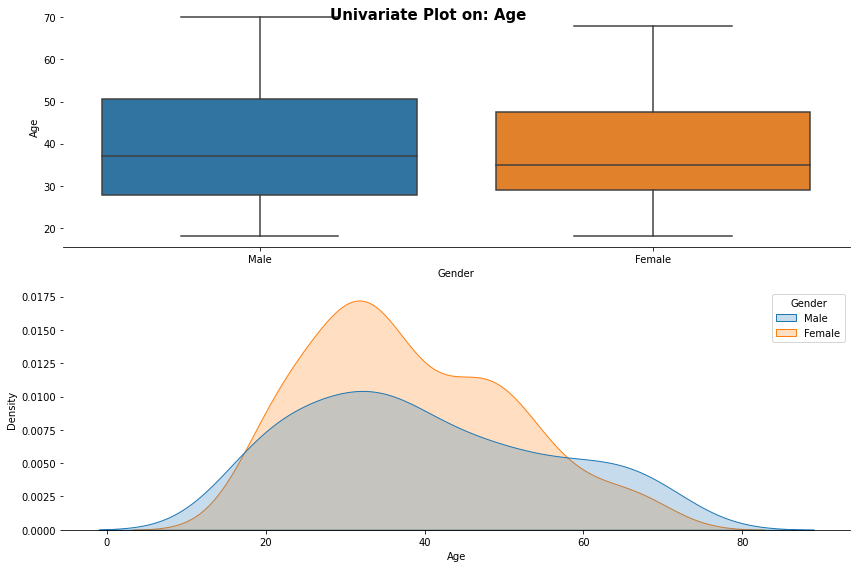

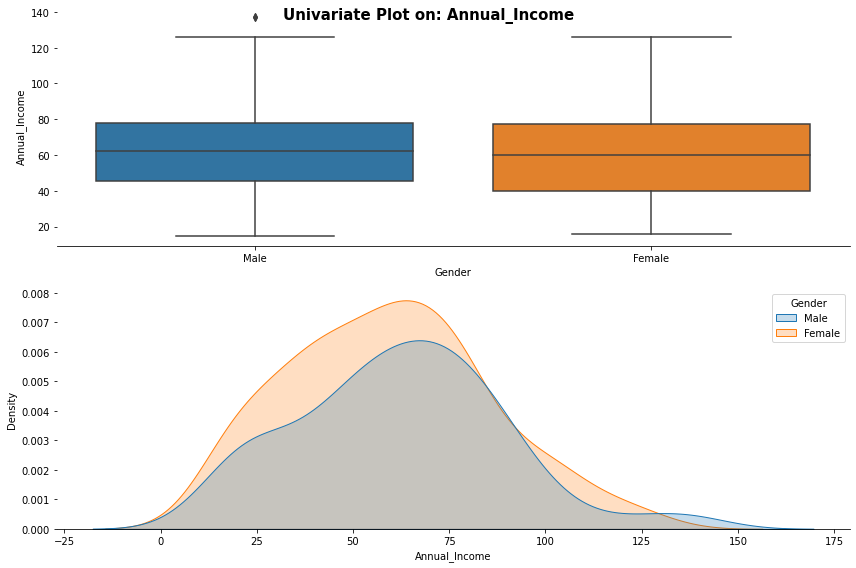

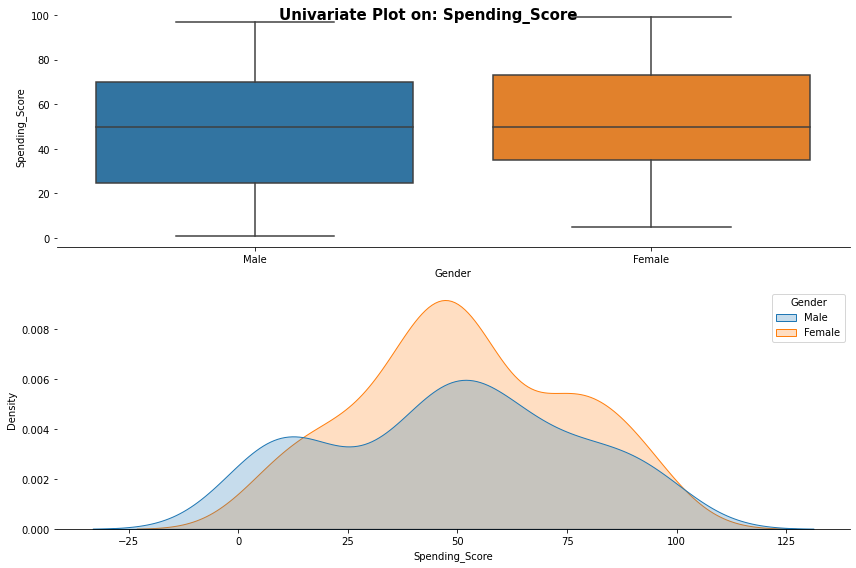

In [24]:
print(con_cols)
for i in range(len(con_cols)):
  print(i)
  cat_name = con_cols[i]
  univariate_continous_graphs(mall_cust_data, cat_name)

**Insights:**
1. Larger frequency of female customers between the age of 20 and 40.
2. Similarly, more number of female customers, in income range between 37k USD and 70k USD.
3. Spending _Score Chart also suggests dominance of female customers.
4. Median Age of male customer is slightly higher than female.
5. Average of Annual Income of male customers also very slightly higher than female. But, this is due to the presence of an outlier at 137k USD.
6. Average Mall Card Score of Male and Female customers are almost equal, yet male scores range wider than female scores.

#### Binning some columns to create categories out of them for better understanding of customer distribution.

In [25]:
mall_cust_data['Age_Bins']=pd.cut(x=mall_cust_data['Age'], bins=(18,25,35,50,70), labels=('18-25', '25-35', '35-50', '50-70'))
mall_cust_data['Income_Segment']=pd.cut(x=mall_cust_data['Annual_Income'], bins=(15,55,95,137), labels=('Lower', 'Middle', 'Higher'))
mall_cust_data['Spending_Score_Segment']=pd.cut(x=mall_cust_data['Spending_Score'], bins=(0,40,70,100), labels=('Low_Score', 'Average_Score', 'High_Score'))

In [26]:
mall_cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Gender                  200 non-null    object  
 1   Age                     200 non-null    int64   
 2   Annual_Income           200 non-null    int64   
 3   Spending_Score          200 non-null    int64   
 4   Age_Bins                196 non-null    category
 5   Income_Segment          198 non-null    category
 6   Spending_Score_Segment  200 non-null    category
dtypes: category(3), int64(3), object(1)
memory usage: 7.4+ KB


In [27]:
for i in mall_cust_data.columns.tolist():
  if mall_cust_data[i].dtype=='category':
    cat_cols.append(i)

cat_cols


['Gender', 'Age_Bins', 'Income_Segment', 'Spending_Score_Segment']

In [28]:
def univariate_categorical_graphs(dataset, feature):
  plt.figure(figsize=(8,6))
  plt.suptitle('Univariate Counplot on: '+ feature)
  
  pt=sns.countplot(x=feature, data= dataset)
  
  for p in pt.patches:
    perc='{:.1f}%'.format(100*p.get_height()/len(dataset[feature]))
    x=p.get_x()+p.get_width()/2
    y=p.get_y()+p.get_height()/2
    plt.annotate(perc, xy=(x,y), ha='center')

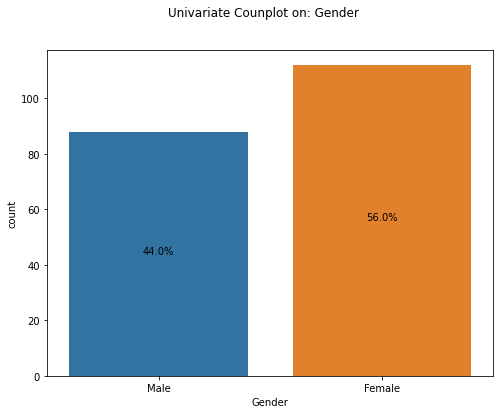

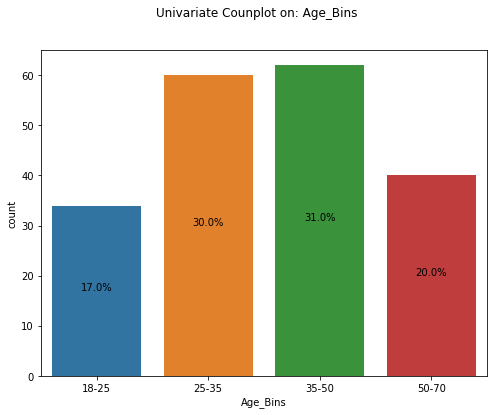

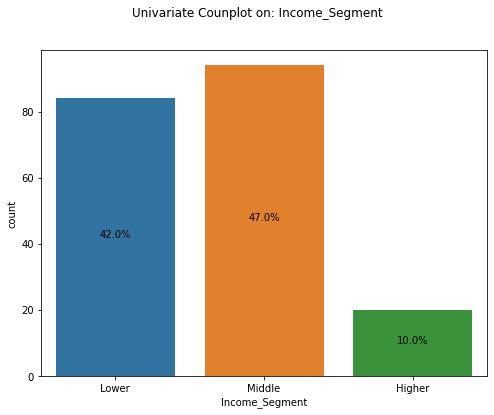

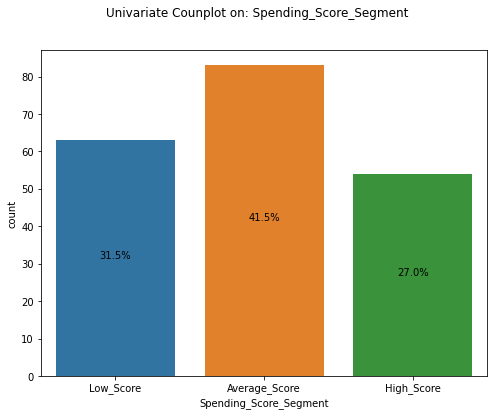

In [29]:
for i in range(len(cat_cols)):
  column=cat_cols[i]
  univariate_categorical_graphs(mall_cust_data, column)

**Insights:**
1. Almost two-thirds of the customers lie between the age of 25 and 50.
2. Almost 50% of customers belong to Middle Income Group. Only 10% have an income towards the higher side.
3. Only 27% of the customers' Mall-Card_Score is above 75.


##Bivariate Analysis

In [30]:
mall_cust_data.corr()

,Age,Annual_Income,Spending_Score
Age,1.000000,-0.012398,-0.327227
Annual_Income,-0.012398,1.000000,0.009903
Spending_Score,-0.327227,0.009903,1.000000


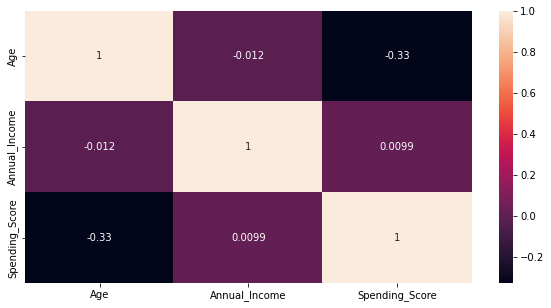

In [31]:
plt.figure(figsize=(10,5))
sns.heatmap(mall_cust_data.corr(), annot=True)

**Insights:**
1. Age has a negative correlation with both Annual Income and Soending Score. This indicates, generally, with increasing age, annual income decreases and so does the Spending_Score.

2. Annual Income and Spending Segment has a positive correlation. This could mean people falling towards the higher income could also have higher Spending Score. 

<Figure size 1080x576 with 0 Axes>

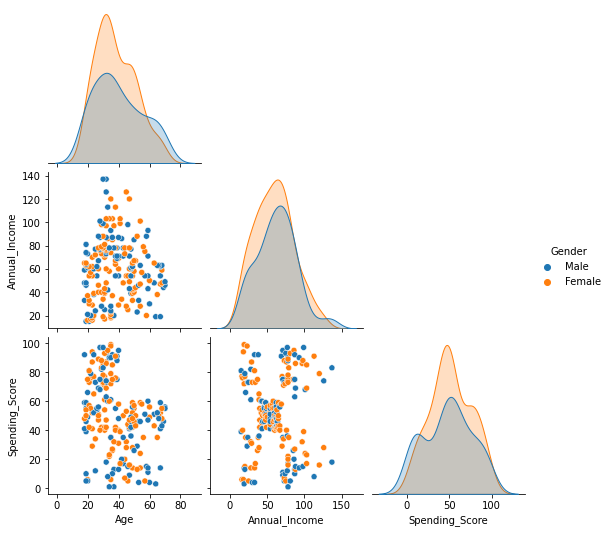

In [32]:
plt.figure(figsize=(15,8))
sns.pairplot(data=mall_cust_data, corner=True, hue='Gender')

**Insights:**
1. As can be seen from Annual Income vs Spending Score, we can see approximately 5 clusters.
2. Age vs Spending score could be seen making 3 clusters, but not as specific.
3. Similarly, Age and Annual Income could also not make any clusters.

Seeing the mean values based on Gender.

In [33]:
mall_cust_data.groupby(by='Gender').mean()

,Age,Annual_Income,Spending_Score
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


**Observation:**
1. Mean age of male customers slightly higher than female.
2. Average Annual Income of make customers higher than female customers.
3. However, female customers have a higher average spending score. 

#<center> Clustering

###Univariate Clustering

In [65]:
#Initiaitng KMeans algorithm
clustering1 = KMeans()

In [66]:
# Training Data to clustering
clustering1.fit(mall_cust_data[['Annual_Income']])

KMeans()

In [67]:
# Checking all the clustering labels
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5,
       5, 5], dtype=int32)

In [68]:
# Adding the clustering labels to initial dataframe
mall_cust_data['Income_Cluster'] = clustering1.labels_

In [69]:
mall_cust_data.head()

,Gender,Age,Annual_Income,Spending_Score,Age_Bins,Income_Segment,Spending_Score_Segment,Income_Cluster,Income_Spending_Cluster
0,Male,19,15,39,18-25,NaN,Low_Score,0,3
1,Male,21,15,81,18-25,NaN,High_Score,0,2
2,Female,20,16,6,18-25,Lower,Low_Score,0,3
3,Female,23,16,77,18-25,Lower,High_Score,0,2
4,Female,31,17,40,25-35,Lower,Low_Score,0,3


In [70]:
#Checking the number of customers in each cluster
mall_cust_data['Income_Cluster'].value_counts()

1    42
2    36
4    36
6    26
0    24
7    16
3    14
5     6
Name: Income_Cluster, dtype: int64

In [71]:
# Measuring how well the clustering is done
clustering1.inertia_

2857.441697191697

In [73]:
# Creating for loop for number of clusters and calculating inertia at each clustering level. 
inertia_scores=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(mall_cust_data[['Annual_Income']])
  inertia_scores.append(kmeans.inertia_) # appending all inertia scores to the list
inertia_scores

[137277.28000000006,
 48660.888888888876,
 23517.33093093093,
 13278.112713472483,
 8481.49619047619,
 5081.484660267268,
 3931.9880952380945,
 2822.4996947496966,
 2176.2809523809533,
 1838.4626559714798]

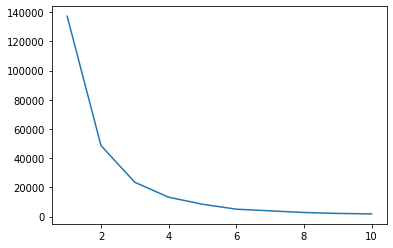

In [74]:
# Plotting the number of clusters on x-axis and inertia scores on y-axis
plt.plot(range(1,11), inertia_scores)

**Observation:** The elbow starts bending when the number of clusters is 3. Thus initiating the clustering process again, with number of clusters =3.

In [75]:
clustering1 = KMeans(n_clusters=3) # redefining KMeans algorithm with N_Clusters=3
clustering1.fit(mall_cust_data[['Annual_Income']])
mall_cust_data['Income_Cluster'] = clustering1.labels_ # redefining Income_Cluster column
mall_cust_data['Income_Cluster'].value_counts()        # Checking unique values in each cluster

2    90
1    74
0    36
Name: Income_Cluster, dtype: int64

In [77]:
#Analysing the clustering using groupby and mean function
mall_cust_data.groupby(by='Income_Cluster')['Age', 'Annual_Income', 'Spending_Score'].mean()

<ipython-input-77-c03bece4d37e>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mall_cust_data.groupby(by='Income_Cluster')['Age', 'Annual_Income', 'Spending_Score'].mean()


,Age,Annual_Income,Spending_Score
Income_Cluster,,,
0,37.833333,99.888889,50.638889
1,39.500000,33.486486,50.229730
2,38.722222,67.088889,50.000000


**Insights:**

1. Spending Score for all three clusters is pretty standard.
2. Cluster-0 has the lowest mean age, highest annual income and slightly higher Spending score.
3. Cluster-1 has the highest mean age, and lowest income ( as already seen in Correlation Heatmap ).



###Bivariate Clustering

In [78]:
clustering2 = KMeans()  # Initiating another object for KMeans()
clustering2.fit(mall_cust_data[['Annual_Income', 'Spending_Score']]) # Fitting data on two variables
clustering2.labels_

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 7, 1, 7, 7,
       4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 5, 3, 5, 3,
       2, 3, 5, 3, 5, 3, 5, 3, 5, 3, 2, 3, 5, 3, 2, 3, 5, 3, 5, 3, 5, 3,
       5, 3, 5, 3, 5, 3, 2, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3,
       5, 3, 5, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6,
       0, 6], dtype=int32)

In [79]:
# Adding Cluster labels to intial dataframe
mall_cust_data['Income_Spending_Cluster']=clustering2.labels_ 

In [80]:
mall_cust_data.head()

,Gender,Age,Annual_Income,Spending_Score,Age_Bins,Income_Segment,Spending_Score_Segment,Income_Cluster,Income_Spending_Cluster
0,Male,19,15,39,18-25,NaN,Low_Score,1,4
1,Male,21,15,81,18-25,NaN,High_Score,1,1
2,Female,20,16,6,18-25,Lower,Low_Score,1,4
3,Female,23,16,77,18-25,Lower,High_Score,1,1
4,Female,31,17,40,25-35,Lower,Low_Score,1,4


In [81]:
# Measuring how well the clustering is done
clustering2.inertia_

25028.020475269415

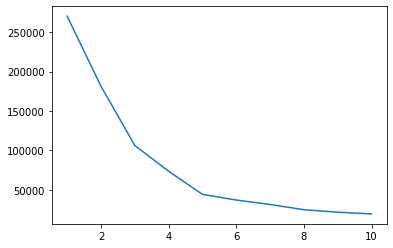

In [82]:
# Creating for loop for number of clusters and calculating inertia at each clustering level. 

inertia_scores2=[]
for i in range(1,11):
  kmeans2=KMeans(n_clusters=i)
  kmeans2.fit(mall_cust_data[['Annual_Income', 'Spending_Score']])
  inertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11), inertia_scores2)

**Observation:** The elbow starts bending when the number of clusters is 5. Thus initiating the clustering process again, with number of clusters =5.

In [84]:
clustering2 = KMeans(n_clusters=5) # redefining KMeans algorithm with N_Clusters=5
clustering2.fit(mall_cust_data[['Annual_Income', 'Spending_Score']])
mall_cust_data['Income_Spending_Cluster'] = clustering2.labels_ # redefining Income_Cluster column
mall_cust_data['Income_Spending_Cluster'].value_counts()        # Checking unique values in each cluster

0    81
3    39
1    35
4    23
2    22
Name: Income_Spending_Cluster, dtype: int64

In [85]:
# To find out the arithmetic mean of all clusters 
centers=pd.DataFrame(clustering2.cluster_centers_, columns=['x', 'y'])
centers

,x,y
0,55.296296,49.518519
1,88.200000,17.114286
2,25.727273,79.363636
3,86.538462,82.128205
4,26.304348,20.913043


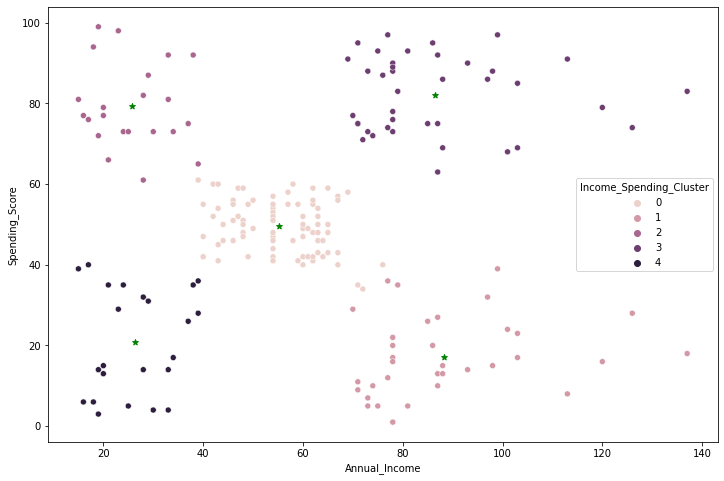

In [86]:
# Visualizing the bivariate clustering using a scatterplot
plt.figure(figsize=(12,8))
plt.scatter(x=centers['x'], y=centers['y'], c='green', marker='*')

sns.scatterplot(data= mall_cust_data, x='Annual_Income', y='Spending_Score', hue='Income_Spending_Cluster')

**Insights:**

1. *Cluster-3 and Cluster-2 has highest Spending Score.*
2. Cluster-1 has the high annual income yet less spending score.
3. Cluster-0 has medium annual income and medium score.

In [53]:
# Visualizing Gender Distribution of each cluster.
pd.crosstab(index=mall_cust_data['Income_Spending_Cluster'], columns=mall_cust_data['Gender'], normalize='index')

Gender,Female,Male
Income_Spending_Cluster,,
0,0.538462,0.461538
1,0.592593,0.407407
2,0.590909,0.409091
3,0.608696,0.391304
4,0.457143,0.542857


In [88]:
#Analysing the clustering using groupby and mean function
mall_cust_data.groupby(by='Income_Spending_Cluster')['Age', 'Annual_Income', 'Spending_Score'].mean()

<ipython-input-88-f45bf6b6022b>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mall_cust_data.groupby(by='Income_Spending_Cluster')['Age', 'Annual_Income', 'Spending_Score'].mean()


,Age,Annual_Income,Spending_Score
Income_Spending_Cluster,,,
0,42.716049,55.296296,49.518519
1,41.114286,88.200000,17.114286
2,25.272727,25.727273,79.363636
3,32.692308,86.538462,82.128205
4,45.217391,26.304348,20.913043


**Observations:**

1. As seen in the scatter plot, Cluster-3 has the highest spending score, followed by Cluster-2.
2. Cluster-0 has an average spending score.





###Multivariate Clustering

In [89]:
# importing StandardScaler from scikit learn library 
from sklearn.preprocessing import StandardScaler

In [90]:
#initiating object of the class
sc = StandardScaler()

In [91]:
# Converting categorical columns to binary and dropping first columns
mall_cust_data_2 = pd.get_dummies(mall_cust_data, drop_first=True)

In [92]:
mall_cust_data_2.head()

,Age,Annual_Income,Spending_Score,Income_Cluster,Income_Spending_Cluster,Gender_Male,Age_Bins_25-35,Age_Bins_35-50,Age_Bins_50-70,Income_Segment_Middle,Income_Segment_Higher,Spending_Score_Segment_Average_Score,Spending_Score_Segment_High_Score
0,19,15,39,1,4,1,0,0,0,0,0,0,0
1,21,15,81,1,2,1,0,0,0,0,0,0,1
2,20,16,6,1,4,0,0,0,0,0,0,0,0
3,23,16,77,1,2,0,0,0,0,0,0,0,1
4,31,17,40,1,4,0,1,0,0,0,0,0,0


In [93]:
#Dropping all the binned columns and categorical columns apart from Gender_Male
mall_cust_data_2 = mall_cust_data_2[['Age', 'Annual_Income', 'Spending_Score', 'Gender_Male']]

In [94]:
mall_cust_data_2.head()

,Age,Annual_Income,Spending_Score,Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [95]:
#Scaling the data and storing in a pandas DataFrame
mall_cust_data_scaled = pd.DataFrame(sc.fit_transform(mall_cust_data_2))

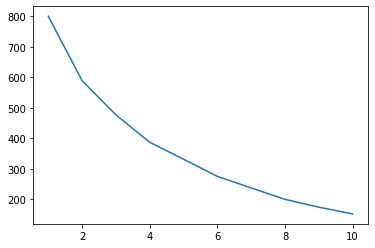

In [98]:
# Creating for loop for number of clusters and calculating inertia at each clustering level.
inertia_scores3=[]
for i in range(1,11):
  kmeans3=KMeans(n_clusters=i)
  kmeans3.fit(mall_cust_data_scaled)
  inertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11), inertia_scores3)

**Observation:** This is a very smooth elbow turn. Probably we can say that creating 4 clusters would be okay.

In [99]:
# Creating for loop for number of clusters and calculating inertia at each clustering level. 
clustering3 = KMeans(n_clusters=4)  # initiating KMeans algorithm with N_Clusters=4
clustering3.fit(mall_cust_data_2[['Age', 'Annual_Income', 'Spending_Score', 'Gender_Male']])
mall_cust_data_2['Multivariate_Cluster']=clustering3.labels_
mall_cust_data_2['Multivariate_Cluster'].value_counts()

0    95
1    39
3    38
2    28
Name: Multivariate_Cluster, dtype: int64

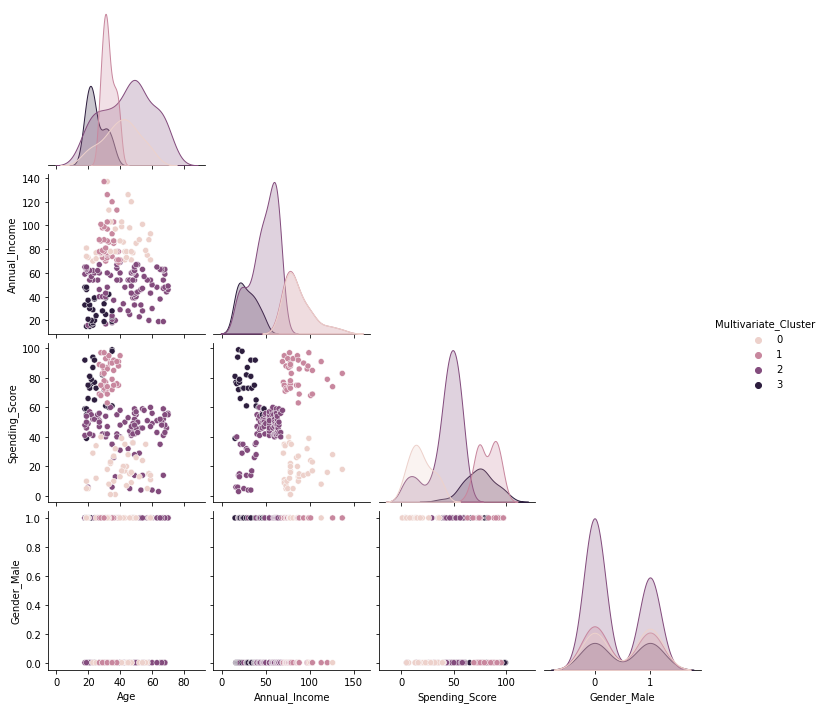

In [64]:

sns.pairplot(data= mall_cust_data_2, hue='Multivariate_Cluster', corner=True)

**Observation:** 

The mulitivariate clustering is not giving very major insights on the data. By far, the Bivariate clustering gave quite clear insights.

1. Cluster-3 has the highest average annual income and highest Spending Score, with avearge age of customers at 32.

2. Cluster-2 has high Spending Score, even when the average annual income is quite low. Mean age of the group is 25.

*Cluster-3 and Cluster-2 could be our primary target groups, which give us the highest income. The Mall should create some attractive offers to them on product based on their age group and income.*

*Cluster-0 has an medium average annual income, and a medium spending score of around 50. This could be our secondary target group also.*

#<center> Summary



*   First, we did an EDA - Univariate and Bivariate and Multivariate, to find important insights of our data and then developed three clustering models:

           *   Model1: Univariate - Based on Annual Income.
           *   Model2: Bivariate - Based on Annual Income and Spending score.
           *   Model3: Multivariate - Based on Annual Income, Spending Score, Age and Gender.


*   Model2 gave us the best and clearest insights on our data
*   We could introduce some attractive offers based on the clustering mentioned above to improve sales and income of the mall.









